In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'../../FEVS2021_PRDF_CSV/2021_OPM_FEVS_PRDF.csv')
## Checking if there is any duplicate values
df

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292515,154057939422,ST,3.0,4.0,4.0,3.0,4,4,2,4,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2,2,3,3,...,B,B,B,A,A,A,B,B,D,4.427855
292517,143492802997,ST,3.0,3.0,NaN,4.0,4,4,4,3,...,NaN,NaN,NaN,NaN,NaN,A,A,NaN,A,4.202227
292518,110267537558,ST,2.0,4.0,5.0,5.0,2,1,5,4,...,B,B,B,A,A,A,B,B,C,3.523113


In [5]:
df.drop_duplicates() ##dropping all the duplicate values
print()
print(df.info())  ##checking the data types of every column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        290770 non-null  object 
 7   Q6        286449 non-null  object 
 8   Q7        290240 non-null  object 
 9   Q8        291451 non-null  object 
 10  Q9        291910 non-null  float64
 11  Q10       292038 non-null  object 
 12  Q11       292018 non-null  object 
 13  Q12       291755 non-null  object 
 14  Q13       291920 non-null  object 
 15  Q14       291306 non-null  object 
 16  Q15       288257 non-null  object 
 17  Q16       290367 non-null  object 
 18  Q17       290268 non-null  object 
 19  Q18       291274 non-null  object 
 20  Q19

In [6]:
df.Q11.value_counts()

2    98762
X    72324
5    53853
1    41320
3    19878
4     5881
Name: Q11, dtype: int64

In [7]:
df.head()

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5,4,4,4,...,A,B,B,B,B,A,A,A,A,2.209652
1,194868625278,XX,3.0,2.0,4.0,3.0,4,2,4,2,...,NaN,A,B,B,B,B,A,A,C,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3,4,5,4,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5,5,5,5,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4,3,5,4,...,B,B,B,B,B,B,A,A,A,1.735842


In [8]:
df['Q1'].describe()

count    291074.000000
mean          3.843239
std           1.086775
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Q1, dtype: float64

### Data Cleaning

In [9]:
## There are certain variables which should be nature but they are not because some of the entries have string value.
df_c  = df.copy()
objects= [column for column, is_type in (df_c.dtypes=="object").items() if is_type] ## Extracting out all the value which should be integar but is not
## The column 'agency' holds no significance here so it is to be dropped.
objects.remove('agency')
for i in objects:
    df_c[i] = df_c[i].replace(['X'], np.nan)
    df_c[i] = df_c[i].replace(np.nan, 0)
df_c.isnull().sum().sum()

276131

In [10]:
objects[:-9]
for i in objects[:-9]:
    df_c[i] = df_c[i].astype(float)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292520 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  292520 non-null  int64  
 1   agency    292520 non-null  object 
 2   Q1        291074 non-null  float64
 3   Q2        288624 non-null  float64
 4   Q3        290112 non-null  float64
 5   Q4        291324 non-null  float64
 6   Q5        292520 non-null  float64
 7   Q6        292520 non-null  float64
 8   Q7        292520 non-null  float64
 9   Q8        292520 non-null  float64
 10  Q9        291910 non-null  float64
 11  Q10       292520 non-null  float64
 12  Q11       292520 non-null  float64
 13  Q12       292520 non-null  float64
 14  Q13       292520 non-null  float64
 15  Q14       292520 non-null  float64
 16  Q15       292520 non-null  float64
 17  Q16       292520 non-null  float64
 18  Q17       292520 non-null  float64
 19  Q18       292520 non-null  float64
 20  Q19 

In [11]:
df_c = df_c.dropna()
df_c.isnull().sum().sum() ##-> No missing values found in the dataset

0

In [12]:
print('The number of survey entries altered:',df.shape[0]-df_c.shape[0]) 
print('The percentage of alterations from the original dataset is: ',round(((df.shape[0]-df_c.shape[0])/(df.shape[0])),2)*100,'%')


The number of survey entries altered: 54401
The percentage of alterations from the original dataset is:  19.0 %


In [13]:
df_ca = df_c.copy()
for i in df_ca.columns.values:
        df_ca[i] = df_ca[i].replace(0,df_ca[i].value_counts().idxmax())
df_ca

,RandomID,agency,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,DRNO,DHISP,DDIS,DAGEGRP,DSUPER,DFEDTEN,DSEX,DMIL,DLEAVING,POSTWT
0,112970976817,XX,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,...,A,B,B,B,B,A,A,A,A,2.209652
2,152966380283,XX,5.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0,...,B,B,B,B,A,B,A,B,C,1.858874
3,193041162980,XX,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,B,B,A,B,B,B,A,A,A,1.228573
4,146655962451,XX,4.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,...,B,B,B,B,B,B,A,A,A,1.735842
5,195312241136,XX,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,A,B,B,B,A,B,B,A,A,2.076046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292514,117508083776,ST,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,B,B,B,A,A,A,A,B,A,3.487832
292515,154057939422,ST,3.0,4.0,4.0,3.0,4.0,4.0,2.0,4.0,...,B,B,B,A,A,A,B,B,A,3.004992
292516,151758964104,ST,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,...,B,B,B,A,A,A,B,B,D,4.427855
292518,110267537558,ST,2.0,4.0,5.0,5.0,2.0,1.0,5.0,4.0,...,B,B,B,A,A,A,B,B,C,3.523113


In [14]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238119 entries, 0 to 292519
Data columns (total 79 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RandomID  238119 non-null  int64  
 1   agency    238119 non-null  object 
 2   Q1        238119 non-null  float64
 3   Q2        238119 non-null  float64
 4   Q3        238119 non-null  float64
 5   Q4        238119 non-null  float64
 6   Q5        238119 non-null  float64
 7   Q6        238119 non-null  float64
 8   Q7        238119 non-null  float64
 9   Q8        238119 non-null  float64
 10  Q9        238119 non-null  float64
 11  Q10       238119 non-null  float64
 12  Q11       238119 non-null  float64
 13  Q12       238119 non-null  float64
 14  Q13       238119 non-null  float64
 15  Q14       238119 non-null  float64
 16  Q15       238119 non-null  float64
 17  Q16       238119 non-null  float64
 18  Q17       238119 non-null  float64
 19  Q18       238119 non-null  float64
 20  Q19 

In [15]:
df_num = df_ca.iloc[:, 2:69].copy()

In [60]:
pear_cor = df_num.corr(method='pearson')


In [61]:
pear_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.757186,0.660019,0.570816,0.379521,0.679205,0.522606,0.529574,0.462433,0.411635,...,0.458421,0.449047,0.387348,0.489272,0.481446,0.496708,0.072270,0.385662,0.431954,0.464733
Q2,0.757186,1.000000,0.665843,0.583811,0.354646,0.676691,0.527343,0.549491,0.470636,0.418880,...,0.460632,0.452254,0.393271,0.494324,0.487018,0.512384,0.078436,0.386478,0.432581,0.472397
Q3,0.660019,0.665843,1.000000,0.610775,0.333958,0.660889,0.581744,0.461934,0.430758,0.357551,...,0.416989,0.410745,0.356140,0.428561,0.425047,0.435154,0.052284,0.352937,0.393511,0.434817
Q4,0.570816,0.583811,0.610775,1.000000,0.370219,0.575966,0.586662,0.463512,0.435259,0.348044,...,0.377221,0.373853,0.351112,0.423261,0.420527,0.433385,0.019830,0.341523,0.363018,0.397279
Q5,0.379521,0.354646,0.333958,0.370219,1.000000,0.388275,0.307549,0.318755,0.289898,0.280343,...,0.280809,0.275535,0.280233,0.274577,0.275041,0.278229,0.002352,0.259065,0.280514,0.295304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.496708,0.512384,0.435154,0.433385,0.278229,0.457097,0.390185,0.494032,0.466365,0.393392,...,0.537453,0.533294,0.432195,0.864863,0.868683,1.000000,0.090328,0.406847,0.496459,0.512677
Q54,0.072270,0.078436,0.052284,0.019830,0.002352,0.043567,0.056845,0.062324,0.069687,0.087105,...,0.117086,0.111763,0.026469,0.094996,0.095346,0.090328,1.000000,0.039465,0.062701,0.116720
Q55,0.385662,0.386478,0.352937,0.341523,0.259065,0.354893,0.352687,0.342762,0.296361,0.312361,...,0.527744,0.527118,0.690283,0.393499,0.396891,0.406847,0.039465,1.000000,0.654280,0.630240
Q56,0.431954,0.432581,0.393511,0.363018,0.280514,0.396474,0.378859,0.420231,0.328781,0.339029,...,0.688437,0.688374,0.624308,0.495725,0.503873,0.496459,0.062701,0.654280,1.000000,0.756619


In [62]:
ken_cor = df_num.corr(method='kendall')


In [63]:
ken_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.692293,0.595676,0.524766,0.351056,0.607446,0.495289,0.459607,0.401945,0.347412,...,0.411143,0.406026,0.344097,0.429011,0.423629,0.431469,0.064179,0.356151,0.387207,0.415943
Q2,0.692293,1.000000,0.602614,0.532444,0.323048,0.602155,0.494229,0.472876,0.405157,0.349662,...,0.406454,0.402410,0.342576,0.432212,0.427122,0.441886,0.069137,0.350298,0.381839,0.414960
Q3,0.595676,0.602614,1.000000,0.578283,0.307189,0.601493,0.551294,0.407312,0.377388,0.302036,...,0.373354,0.370111,0.317094,0.381516,0.378029,0.382113,0.041511,0.326505,0.353023,0.387385
Q4,0.524766,0.532444,0.578283,1.000000,0.348849,0.534855,0.564873,0.420292,0.387645,0.302484,...,0.354695,0.354203,0.322171,0.386363,0.384660,0.389996,0.015907,0.325264,0.338463,0.371092
Q5,0.351056,0.323048,0.307189,0.348849,1.000000,0.372770,0.303965,0.288939,0.262126,0.241063,...,0.258737,0.256046,0.250777,0.250462,0.250523,0.251677,0.001997,0.242272,0.255265,0.273866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.431469,0.441886,0.382113,0.389996,0.251677,0.393765,0.373702,0.419659,0.415772,0.330710,...,0.521779,0.519489,0.409454,0.855484,0.864310,1.000000,0.087914,0.388328,0.454119,0.469396
Q54,0.064179,0.069137,0.041511,0.015907,0.001997,0.037041,0.048305,0.053972,0.066080,0.073056,...,0.106995,0.103516,0.026668,0.092691,0.093730,0.087914,1.000000,0.047734,0.062568,0.100447
Q55,0.356151,0.350298,0.326505,0.325264,0.242272,0.327683,0.337923,0.309767,0.277630,0.272308,...,0.500531,0.500532,0.615008,0.382788,0.383046,0.388328,0.047734,1.000000,0.639468,0.611679
Q56,0.387207,0.381839,0.353023,0.338463,0.255265,0.355346,0.356545,0.365699,0.298367,0.291102,...,0.617530,0.618313,0.565026,0.456182,0.459224,0.454119,0.062568,0.639468,1.000000,0.722960


In [64]:
spear_cor = df_num.corr(method='spearman')


In [65]:
spear_cor

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57
Q1,1.000000,0.752209,0.653506,0.575270,0.403294,0.670387,0.542430,0.515139,0.444680,0.400159,...,0.459743,0.454345,0.395156,0.472102,0.465991,0.477837,0.071507,0.407239,0.440811,0.472230
Q2,0.752209,1.000000,0.663924,0.586770,0.374396,0.669308,0.544532,0.531515,0.450771,0.404742,...,0.457460,0.453093,0.395497,0.478380,0.472622,0.491290,0.077592,0.403181,0.437653,0.473798
Q3,0.653506,0.663924,1.000000,0.628795,0.352821,0.663247,0.598841,0.458100,0.417022,0.348231,...,0.417995,0.414446,0.364292,0.420158,0.416068,0.423829,0.046081,0.373473,0.402100,0.439612
Q4,0.575270,0.586770,0.628795,1.000000,0.394416,0.589655,0.604361,0.466295,0.421347,0.343907,...,0.392557,0.391865,0.365017,0.419095,0.416886,0.426041,0.017364,0.366601,0.380673,0.416448
Q5,0.403294,0.374396,0.352821,0.394416,1.000000,0.428533,0.341224,0.333562,0.296471,0.282954,...,0.297178,0.294094,0.294325,0.282739,0.282503,0.286484,0.002256,0.282858,0.297323,0.318919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.477837,0.491290,0.423829,0.426041,0.286484,0.440827,0.405769,0.464210,0.450763,0.375135,...,0.564703,0.562045,0.456046,0.883039,0.890657,1.000000,0.095351,0.432906,0.501524,0.518200
Q54,0.071507,0.077592,0.046081,0.017364,0.002256,0.041583,0.052058,0.060159,0.071374,0.082485,...,0.117406,0.113491,0.029967,0.099482,0.100504,0.095351,1.000000,0.053119,0.069544,0.112032
Q55,0.407239,0.403181,0.373473,0.366601,0.282858,0.378337,0.376829,0.355129,0.311434,0.316937,...,0.555951,0.555531,0.676014,0.424077,0.423846,0.432906,0.053119,1.000000,0.702961,0.677775
Q56,0.440811,0.437653,0.402100,0.380673,0.297323,0.408493,0.396677,0.416444,0.333807,0.337669,...,0.671937,0.672277,0.631737,0.500300,0.502617,0.501524,0.069544,0.702961,1.000000,0.780769


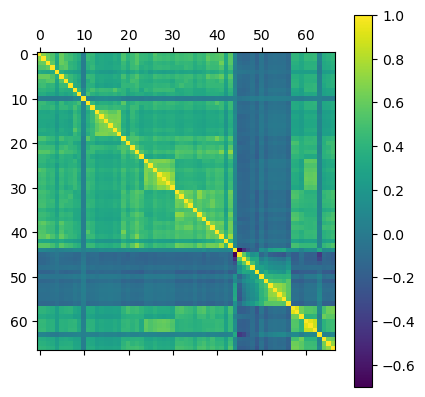

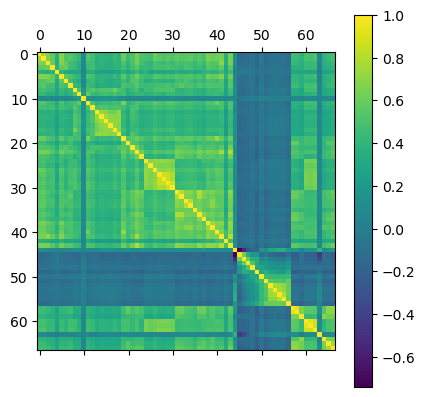

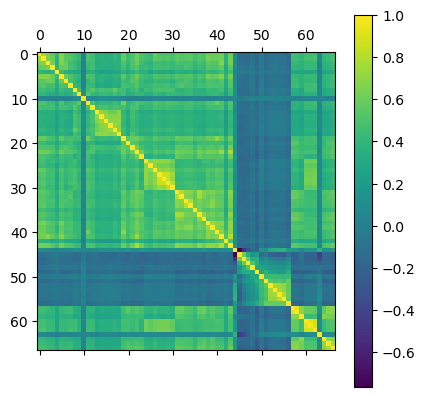

In [72]:
plt.matshow(ken_cor)
plt.colorbar()
plt.show()
plt.matshow(pear_cor)
plt.colorbar()
plt.show()
plt.matshow(spear_cor)
plt.colorbar()
plt.show()

In [92]:
neg_col = [name for name, vals in ken_cor.items() if vals.sum() < 5]

In [93]:
ken_cor[neg_col]

,Q11,Q46,Q47_01,Q47_02,Q47_03,Q47_04,Q47_05,Q47_06,Q47_07,Q47_08,Q47_09,Q47_10,Q47_11,Q54
Q1,0.025833,-0.120097,-0.138212,-0.129690,-0.073327,-0.160319,-0.034332,-0.131947,-0.076765,-0.063907,-0.077274,-0.073784,-0.120584,0.064179
Q2,0.029579,-0.111998,-0.134888,-0.129424,-0.071858,-0.157621,-0.037774,-0.133252,-0.081881,-0.066682,-0.080272,-0.076536,-0.123037,0.069137
Q3,0.023300,-0.087541,-0.111543,-0.106494,-0.065026,-0.151413,-0.044244,-0.124671,-0.082709,-0.070462,-0.080427,-0.075975,-0.116169,0.041511
Q4,0.022781,-0.059547,-0.076510,-0.082423,-0.057620,-0.132991,-0.036736,-0.112792,-0.066794,-0.059344,-0.069536,-0.066424,-0.111131,0.015907
Q5,0.020534,-0.028065,-0.032852,-0.047307,-0.041066,-0.079309,-0.039998,-0.082232,-0.046433,-0.037686,-0.050520,-0.058613,-0.078275,0.001997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q53,0.043440,-0.166570,-0.176888,-0.158076,-0.082227,-0.183504,-0.016210,-0.129901,-0.060655,-0.048630,-0.056173,-0.049420,-0.110966,0.087914
Q54,0.037073,-0.419328,-0.343556,-0.197636,-0.079846,-0.115378,0.063455,0.000648,0.052674,0.081935,0.090956,0.102161,0.034682,1.000000
Q55,0.017854,-0.113794,-0.132708,-0.129416,-0.103261,-0.214163,-0.083883,-0.181887,-0.098544,-0.080835,-0.096624,-0.086630,-0.170909,0.047734
Q56,0.021059,-0.143479,-0.151476,-0.138850,-0.092028,-0.215007,-0.062284,-0.180768,-0.108117,-0.081798,-0.103232,-0.096678,-0.167926,0.062568


In [18]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer


In [19]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num)
chi_square_value, p_value


(13264843.857732788, 0.0)

In [21]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num)


In [22]:
kmo_model

0.9776649414273321

In [24]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df_num)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev


array([25.21359915,  4.98146901,  3.42325219,  3.06549709,  2.77062259,
        2.01550843,  1.22317191,  1.14206283,  1.04598084,  0.93094273,
        0.85468232,  0.80676641,  0.77007298,  0.7275763 ,  0.6999716 ,
        0.68037262,  0.64707998,  0.62209267,  0.59545312,  0.57731745,
        0.55482038,  0.54565279,  0.52008504,  0.5141737 ,  0.50136864,
        0.4738685 ,  0.46370149,  0.45381875,  0.43843547,  0.43295597,
        0.41582428,  0.40207296,  0.39790045,  0.39444265,  0.38366001,
        0.36666982,  0.35509196,  0.33118038,  0.32649245,  0.31417034,
        0.31185768,  0.30382211,  0.2916254 ,  0.27119554,  0.26592326,
        0.26199643,  0.25228971,  0.24714811,  0.23834688,  0.2347994 ,
        0.23394126,  0.22675225,  0.2236018 ,  0.22330791,  0.22120266,
        0.21305273,  0.19574736,  0.19142243,  0.18430823,  0.18179268,
        0.17684253,  0.14841913,  0.14536533,  0.12597064,  0.11030369,
        0.07232736,  0.06675923])

In [30]:
factors = [i for i in ev if i > 1]
factors

[25.213599147435133,
 4.981469014690881,
 3.4232521859326845,
 3.0654970899974416,
 2.7706225917017715,
 2.015508431475061,
 1.223171912258254,
 1.1420628285194587,
 1.0459808437497873]

In [56]:
fa = FactorAnalyzer(n_factors=len(factors))
fa.fit(df_num)


FactorAnalyzer(n_factors=9, rotation_kwargs={})

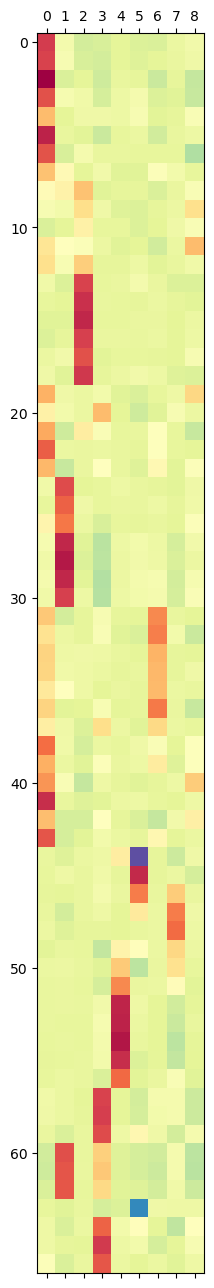

In [57]:
plt.matshow(fa.loadings_,cmap='Spectral_r')
plt.show()

In [58]:
fa.loadings_[:,7].max()

0.6653123497264525

In [59]:
fa.get_factor_variance()


(array([9.57498988, 6.63764037, 4.81288915, 4.73345898, 4.40459161,
        2.24226145, 2.17099434, 1.40145873, 0.98978947]),
 array([0.1429103 , 0.09906926, 0.07183417, 0.07064864, 0.06574017,
        0.03346659, 0.0324029 , 0.02091729, 0.01477298]),
 array([0.1429103 , 0.24197956, 0.31381372, 0.38446236, 0.45020254,
        0.48366913, 0.51607203, 0.53698932, 0.5517623 ]))

Random Forest Models


In [99]:
X = df_num
df_ca['leaveYN']=0
df_ca.loc[df_ca.DLEAVING !='A', 'leaveYN']=1
y = df_ca.leaveYN

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [114]:
%%time
rf_model = RandomForestClassifier(n_estimators=800, max_features=9 , random_state=20)
rf_model.fit(X_train, y_train)


CPU times: user 7min 3s, sys: 2.43 s, total: 7min 6s
Wall time: 7min 6s


RandomForestClassifier(max_features=9, n_estimators=800, random_state=20)

In [115]:
y_pred = rf_model.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 1, 0])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7541575676129683

In [117]:
from sklearn.model_selection import GridSearchCV


In [119]:
%%time
n_estimators = [50, 100, 200, 400]
max_depth = [3, 6, 12]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4] 

paramF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
forest = RandomForestClassifier(max_features=9 , random_state=20)

gridF = GridSearchCV(forest, paramF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
CPU times: user 33.8 s, sys: 932 ms, total: 34.8 s
Wall time: 33min 33s


In [123]:
bestF.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [127]:
forestBest = RandomForestClassifier(max_depth= 12,
 min_samples_leaf= 2,
 min_samples_split= 5,
 n_estimators= 200, max_features=9 , random_state=20)
rf_model.fit(X_train, y_train)



RandomForestClassifier(max_features=9, n_estimators=800, random_state=20)

In [128]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [129]:
accuracy_score(y_test, y_pred)

0.7541575676129683